<img src="https://static.uni-graz.at/fileadmin/nawi-institute/Erdwissenschaften/NawiGrazGeozentrum_Small.png" align="right" width=200>

# Notebook 4: Python Functions and reading files with Numpy

*Developed by Raoul Collenteur and Matevž Vremec, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz*

## Lecture content
1. [Reusable code: Python functions](#1-Python-functions)
2. [Saving and loading functions](#2-Saving-and-loading-functions)
3. [Reading data with Numpy](#3-Reading-data-with-Numpy)
4. [Additional readings](#4-Additional-Readings)

In this notebook we will learn how to write reusable pieces of Python code: functions. Python functions are extremely useful when we need to perform a certain operation or calculation multiple times. Together with the for-loops and conditional statements from the last lecture Python functions form some of the core functionality that makes programming so usefull. Additionally to functions, We will also learn how to read csv (comma separated variables) files, a common format to store spreadsheet data, using Numpy.

In [2]:
# Import the python packages needed in this session
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 1 Python functions
Functions are fundamental building blocks in most programming languages and are used to store repetitive sequences of code to perform a certain (single) task.

As you may have noticed, we have already used quite a few functions throughout our Python programming course. Remember for example `np.sin`, `plt.plot`, or `type`? All of these were in fact functions that defined a piece of code to perform a certain task. Python packages can also be seen as a collection of functions for tasks we have to perform more often, such as calculating the sine, plot a time series or discover the type of a variable.

A function is 'called' by typing in the function name, followed by an opening bracket (`(`), the functions' input arguments, and a closing round bracket (`)`). For example:

In [3]:
np.sin(2)

0.9092974268256817

In the above code-block we use the function `sin` within the numpy package to calculate the $\sin$ of 2. The number 2 is the input argument, and `sin` is the function. Let's look how we can define a function ourselves.

## Function definition
To define a function we start with writing `def` followed a space and then the name of the new function we want to create. The name can be anything but it is common practice to stick to letters, underscores (`_`) and sometimes numbers. It is also good practice to give the function a name that makes clear what the function does (as `multiply` above for example). There are a few function names that are already in use by the Python Standard Library, see additional readings for a list.

The name of the function is followed by an opening bracket `(`, some input arguments, and a closing bracket `)` and a colon `:`. After the opening and closing brackets with the arguments in between, the actual operation begins in the code block starting on the next line, indented by four spaces or a tab. This is quite similar to how for-loops are written. Let's look at a working example:

In [4]:
def print_something(something):
    print(something)  # Note the four spaces at the beginning of this line

Now that we have defined the function, we can call it:

In [5]:
arg = "This is my second function"
print_something(arg)

This is my second function


The above function takes one input argument (`something`) and prints that values to the screen. Often we want a function to do something, and return a value. This can be achieved by adding a `return` statement at the end of a method. For example, consider the following function that multiplies to values, and returns the result.

In [6]:
def multiply(a, b):
    result = a * b
    return result

In [7]:
# Let's use our multiply function
print("2 times 3 is :", multiply(2,3))

2 times 3 is : 6


### Exercise 1a: write a function
Write the following python function :
- named `create_matrix`
- with two input arguments: `n` and `m`
- that creates and returns a NxM numpy array with values 6.0

To test your function, call the method and print the result.

In [8]:
# Define your function here

# Test you method
A = create_matrix(2,2)

NameError: name 'create_matrix' is not defined

[Answer](#Exercise-1a)

### Arguments and keyword arguments
A function can take one or more input arguments, as for example `a` and `b` in the `multiply` function. In many cases, these arguments have some kind of default value. If this is the case, you can provide the default value in the function definition to make your function easier to use. Have a look at this example:

In [9]:
def multiply2(a, b=2):
    val = a * b
    return val

In [10]:
print(multiply2(5)) # No need to fill in the value b
#print(multiply2(5, 3)) # But we still can

10


### Local vs. Global variables
The last thing we want to know about functions (for now at least) is about local versus global variables. local variables are variables that are defined within the function definition. These are not available outside the function. Global variables are defined outside the function, but are available for use within the function. 

It is good practice however, to not use any global variables in a python function. This ensures that we can use to function in other places. Python first checks for local variables and, if it cannot find any, will go to global variables.

In [11]:
b = 2 # Global variable

def add(a, b=2):
    c = 4 # Local variable
    #d = a + b + c
    #return d
    return a + b + c

add(3)
#print(c) # Will give an error

9

### Exercise 1b: calculate and plot the cumulative sum
In this exercise we will calculate the cumulative sum of a list of numbers. Write a function named `cumsum` that calculates the cumulative sum for a list of numbers. For example, the cumsum of the list [1,2,3] is [1, 4, 7]. Make a plot of the result.

In [12]:
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Write your function here

cumsum(numbers) # => should return [0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55]
# np.cumsum(numbers)  # Check your answer using the Numpy function

plt.plot(cumsum(numbers))

NameError: name 'cumsum' is not defined

[Answer](#Exercise-1b)

## Function Documentation
Remember you can use shift-tab to find out about the input arguments of the function. This will also tell you about the default values. You may have noticed how there is no documentation string (docstring) available for this function. This is because we have not defined it yet. It is good practice to add a docstring to a method. The first line briefly explains what the functions does, and can be followed by more detailed information. In the additional reading list you will find a link with more information about docstrings.

In [13]:
def multiply(a, b):
    """Function that multiplies two values and returns the result.
    
    Parameters
    ----------
    a: int or float
    b: int or float
    
    Returns
    -------
    result: float
        Multplication of a and b.
    
    """
    result = a * b
    return result

multiply?

Signature: multiply(a, b)
Docstring:
Function that multiplies two values and returns the result.

Parameters
----------
a: int or float
b: int or float

Returns
-------
result: float
    Multplication of a and b.
File:      c:\python\nawi_python_course\lecture_4\<ipython-input-13-ab94934b94a6>
Type:      function


### Exercise 1c. Write a Larger than function
Write a function named `is_larger_than` that returns `True` if `x` is larger than `y`, and `False` otherwise. Use a for-loop to test the method by comparing the numbers in the following list to `y=2`: 

In [14]:
values = [1, 2, 7, 0, -1, 4, 3, 1.5]
y = 2

# Your function goes here

for x in values:
    print(is_larger_than(x, y))

NameError: name 'is_larger_than' is not defined

[Answer](#Exercise-1c)

# 2 Saving and loading functions
Functions such as the ones we just creater can also be saved and used in multiple Jupyter Notebooks. This can be done by saving functions in a single `.py` file from which we can then import and use them whenever needed. 
## General concepts of a .py script file
At this point we have been writing our Python code and Markdown comments in single Jupyter notebook documents. In some cases we may want to store part of our code (functions) in a separate document making our Juypter Notebook easier to read and use. 

Alternatevely, we can write and run all of our commands in a Python script file. A Python script file is simply a text file, containing a list of the commands we would like to run. The Python command are formatted the same way as in Jupyter Notebook code cells. Python script files traditionally use the `.py` file extension in their names.

### Exercise 2. Saving and calling Python functions from a script file 
Write a function named `celsius_to_kelvins` that converts temperatures from Celsius to Kelvins, and store it in a script file named `utils.py`. The file should be stored in the same folder as the Jupyter Notebook. 

Convert 28 °C to Kelvin, by calling and using the `celsius_to_kelvins` function from `utils.py`.

In [15]:
# Importing our script functions
from utils import celsius_to_kelvins  

print(celsius_to_kelvins(28))

301.15


# 3 Reading data with Numpy
So far, we have only worked with data that was directly defined in our Jupyter Notebook (see e.g., the list with numbers in the above code blocks). In real life however, we often need to import some data that has been stored in different types of files. A common format is CSV, or comma separated variables, files. These files can be recognized by the file extension .csv (e.g., `myfile.csv`).

There are many function available through different python packages to import csv-files. A common method is numpy's `loadtxt` method. Here you can find more about this method: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html

Let's have a look at the docstring of this method:

In [16]:
np.loadtxt # Use shift_tab to get more information

<function numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, like=None)>

### Numpy loadtxt

Let's look at some read data this time. In this lecture we will look at some data of the slope of the beach-face and the sediment size. Bujan et al (2018) created a dataset collected from 78 peer-reviewed articles. This dataset is available on Zenodo:

*Bujan, Nans, Cox, Ronadh, & Masselink, Gerd. (2018). From fine sand to boulders: examining the relationship between beach-face slope and sediment size. Dataset and references. [Data set]. Zenodo. http://doi.org/10.5281/zenodo.3241984*

The file contains information contained in different columns. We want to use this dataset to explore the relationship between the size of the sediments and the slope of the beach face. What could be our hypothesis of this relationship?

In [17]:
# Make sure this file is in the same folder as this notebook
fname = "Size-Slope-Data-Points.csv"

# Go through all of the (keyword) arguments to see what they do
data = np.loadtxt(fname, delimiter=";", usecols=[2,3,4,5], skiprows=1)
print(data)

[[ 1.600e+01  1.000e-01 -4.000e+00  5.710e+00]
 [ 2.600e+00  9.500e-02 -1.379e+00  5.430e+00]
 [ 2.000e+00  5.500e-02 -1.000e+00  3.150e+00]
 ...
 [ 1.700e-01  1.100e-02  2.556e+00  6.400e-01]
 [ 1.400e+02  2.700e-01 -7.129e+00  1.511e+01]
 [ 7.000e+01  1.230e-01 -6.129e+00  7.010e+00]]


Text(0, 0.5, 'Slope (deg)')

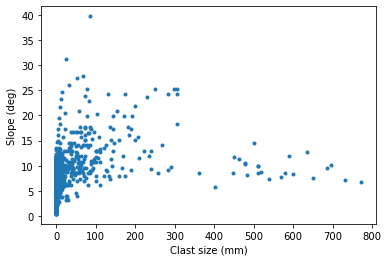

In [18]:
plt.plot(data[:,0], data[:,3], linestyle=" ", marker=".")

# Clast size (mm), Slope (tan), Clast size (), Slope (deg)
plt.xlabel("Clast size (mm)")
plt.ylabel("Slope (deg)")

### Exercise 3
Write a function that the loads data from a file and plots two columns. The function has the following description:

- named `plot_data`
- three input arguments: `fname`, `x` and `y`. Where fname is a string with the file path and x and y are integers to select the columns.
- create a plot of the data with correct x-y labels. You need to store the names of the columns within the function and select the correct a and y labels to do this.
- no return statement is needed, but you may return the Matplotlib Axes that are returned by the plot method.


In [19]:
# Type your answer here

# Test the function
fname = "Size-Slope-Data-Points.csv"

plot_data(fname, x=0, y=3)

NameError: name 'plot_data' is not defined

[Answer](Exercise-3)

# 4 Additional Readings

Below is a list of recommended additional readings on the topics of this Notebook:
- More info on documentation strings (Docstrings) https://numpydoc.readthedocs.io/en/latest/format.html
- Reserved python function names: https://docs.python.org/2/library/functions.html
- More information on Python functions: https://www.python-course.eu/python3_functions.php

# Answers to the exercises

## Exercise 1a

In [20]:
# Define your function here
def create_matrix(n, m):
    res = np.full((n, m), 6.0)
    return res
# Test you method
A = create_matrix(2,2)
print(A)

[[6. 6.]
 [6. 6.]]


## Exercise 1b

In [21]:
# Possible solutions
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def cumsum(numbers):
    cs = [numbers[0]]
    for num in numbers[1:]:
        cs.append(cs[-1] + num)
    return cs

print(cumsum(numbers))

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55]


## Exercise 1c

In [22]:
values = [1, 2, 7, 0, -1, 4, 3, 1.5]
y = 2

# Your function goes here

for x in values:
    print(is_larger_than(x, y))

NameError: name 'is_larger_than' is not defined

## Exercice 2

In [23]:
# Save this function in utils.py
def celsius_to_kelvins(temp_celsius):
    return temp_celsius + 273.15

## Exercise 3

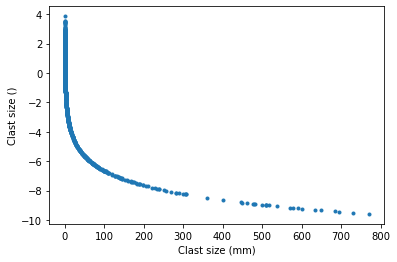

In [24]:
# Type your answer here
def plot_data(fname, x, y):
    columns = ["Clast size (mm)", "Slope (tan)", "Clast size ()", "Slope (deg)"]
    data = data = np.loadtxt(fname, delimiter=";", usecols=[2,3,4,5], skiprows=1)
    ax = plt.plot(data[:,x], data[:,y], linestyle=" ", marker=".")
    plt.xlabel(columns[x])
    plt.ylabel(columns[y])
    return ax  # Return the Matplotlib Axes
    
# Test the function
fname = "Size-Slope-Data-Points.csv"

plot_data(fname, 0, 2)